# Projeto Final Módulo 4 
### Trabalho final Módulo 4 | Técnicas de Programação I | Phyton | Degree Let´s Code, turma 814

* `Objetivo`: **Realizar uma EDA (Exploratory Data Analysis) utilizando as bibliotecas do numpy e pandas.**
    * O grupo poderá escolher uma base entre as fornecidas pelos professores ou escolherem uma outra base de dados que possa ser compartilhada.
    * Teremos 10 grupos com 4 pessoas e 3 grupos com 5 pessoas.
    * Grupos devem preencher o nome do participante e a base de dados escolhida no [link](https://docs.google.com/spreadsheets/d/1lWuWHb_d0_rz2wZaPPfDIwdFG3Xn2tf5CywFBhheI38/edit?usp=sharing)
    * Sugestão de [base de dados](https://docs.google.com/spreadsheets/d/1C5KinYE4wAuKvM_Vc1t5HK16n92B_7zoeT8v7ASVP6A/edit?usp=sharing)
    * A apresentação poderá ser construída em um jupyter notebook ou em slides
    * Storytelling
    * **Cada grupo terá no máximo 10 minutos para apresentar a EDA.**


* `Pontos esperados`:
    * Apresente as características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários;
    * Faça uma análise detalhada das variáveis numéricas e categóricas da base de dados, discutindo sua distribuição e outras características relevantes;
    * Limpeza de dados: Considere a avaliação da existência de valores ausentes e de possíveis outliers, discutindo como estes podem ser tratados ou eliminados;
    * Feature engineering: Quais variáveis você poderia criar para enriquecer a análise?
    * Enriquecimento da base: Inclua qualquer outra informação/análise que achar importante.
    * Que outras bases externas ou internas voce buscaria para enriquecer as análises?

* `Integrantes`:
    * Carlos Eduardo Gomes
    * Diego Delfino
    * Felipe Wakami
    * Leonardo Kerkhoff
    
    
* `Base escolhida`: **Microdados do Enem 2019** (Atualizado em 20/05/2021). 
    * Disponível em [enem 2019](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem), extraído em 25/jan/2022.    

## Etapa 1 - ANÁLISE DOS DADOS AUSENTES

#### Instalando as bibliotecas necessárias: pandas, numpy e pandas_profiling

In [115]:
#!pip install pandas
#!pip install numpy
#!pip install pandas-profiling

#### Importando as bibliotecas e selecionando as colunas no dataframe com o import

In [116]:
import pandas as pd
import numpy as np
pd.options.display.float_format= "{:,.2f}".format

#### Selecionamos 19 colunas das 136 disponíveis na base Enem 2019. O df de estudo possui 5.095.270 de linhas e 19 colunas

In [117]:
# selecionando as colunas na variável cols 
# lendo o csv pelo read_csv, separados ; usecols pela variável cols, enconding do alfabeto latino

cols=['SG_UF_RESIDENCIA','SG_UF_NASCIMENTO','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_ESCOLA','CO_ESCOLA','TP_PRESENCA_CN','TP_PRESENCA_CH',
     'TP_PRESENCA_LC','TP_PRESENCA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_LINGUA','NU_NOTA_REDACAO','Q006','Q025']
df = pd.read_csv('./microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv', encoding='latin-1', sep=";", usecols=cols)

In [118]:
df

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,SG_UF_NASCIMENTO,TP_ESCOLA,CO_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q006,Q025
0,SP,36.00,M,3,BA,1,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,A,B
1,BA,23.00,M,1,BA,1,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,C,B
2,CE,39.00,F,3,CE,1,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,B,B
3,TO,25.00,F,1,TO,1,NaN,1,1,1,1,483.80,503.60,537.30,392.00,1,460.00,E,B
4,MG,22.00,F,1,MG,1,NaN,1,1,1,1,513.60,575.50,570.70,677.00,0,860.00,G,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,DF,41.00,F,3,PA,1,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,C,B
5095266,AM,20.00,M,3,AM,1,NaN,0,1,1,0,NaN,578.90,555.50,NaN,1,500.00,C,B
5095267,RS,21.00,M,0,RS,1,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,C,B
5095268,RS,22.00,M,0,RS,1,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,A,B


### Etapa 1.1 - TRATANDO OS DADOS:

#### Verificando os dados vazios

In [119]:
# utilizando o isna para detectar valores ausentes
df.isna().sum()

SG_UF_RESIDENCIA          0
NU_IDADE                 69
TP_SEXO                   0
TP_COR_RACA               0
SG_UF_NASCIMENTO     145249
TP_ESCOLA                 0
CO_ESCOLA           3947858
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
TP_PRESENCA_MT            0
NU_NOTA_CN          1384837
NU_NOTA_CH          1172125
NU_NOTA_LC          1172125
NU_NOTA_MT          1384837
TP_LINGUA                 0
NU_NOTA_REDACAO     1172126
Q006                      0
Q025                      0
dtype: int64

#### Notas
Os vazios em notas são as abstenções e serão mantidos para a análise. 

    * NU_NOTA_CN	    Nota da prova de Ciências da Natureza
    * NU_NOTA_CH	    Nota da prova de Ciências Humanas
    * NU_NOTA_LC	    Nota da prova de Linguagens e Códigos
    * NU_NOTA_MT	    Nota da prova de Matemática
    * NU_NOTA_REDACAO   Nota da prova de redação

#### Código da Escola: CO_ESCOLA 
Os vazios no campo de escolas são escolas sem cadastro ou com informações erradas, e devido à grande quantidade a coluna vai ser dropada.

## Feature engineering
#### Idade: NU_IDADE 
Apresentou 69 campos não populados. Neste caso, os dados faltantes na idade podem ser tratados, pela baixa quantidade em relação à base (será utilizada a mediana, pela interferência dos outliers na média). 

In [120]:
# a mediana da idade é 19, ou seja, é o valor que está exatamente no meio do conjunto de dados.
df.NU_IDADE.median()

19.0

In [121]:
# dropando a coluna Código da Escola
# substituindo os valores NaN em Idade com o fillna a partir da mediana obtido pelo median()

df.drop(['CO_ESCOLA'], axis=1, inplace=True)
df['NU_IDADE']=df.NU_IDADE.fillna(df.NU_IDADE.median())
df.isna().sum()

SG_UF_RESIDENCIA          0
NU_IDADE                  0
TP_SEXO                   0
TP_COR_RACA               0
SG_UF_NASCIMENTO     145249
TP_ESCOLA                 0
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
TP_PRESENCA_MT            0
NU_NOTA_CN          1384837
NU_NOTA_CH          1172125
NU_NOTA_LC          1172125
NU_NOTA_MT          1384837
TP_LINGUA                 0
NU_NOTA_REDACAO     1172126
Q006                      0
Q025                      0
dtype: int64

#### Candidatos eliminados
Serão verificados os candidatos eliminados nas provas. Estes serão dropados. 0: Faltou à prova, 1: Presente na prova e 2: Eliminado na prova

    * TP_PRESENCA_CN: Presença na prova objetiva de Ciências da Natureza
    * TP_PRESENCA_CH: Presença na prova objetiva de Ciências Humanas
    * TP_PRESENCA_LC: Presença na prova objetiva de Linguagens e Códigos
    * TP_PRESENCA_MT: Presença na prova objetiva de Matemática

In [ ]:
df.drop(df[df.TP_PRESENCA_CN == 2].index, inplace=True)
df.drop(df[df.TP_PRESENCA_CH == 2].index, inplace=True)
df.drop(df[df.TP_PRESENCA_LC == 2].index, inplace=True)
df.drop(df[df.TP_PRESENCA_MT == 2].index, inplace=True)

## Enriquecimento da base (Wakami)
#### Cálculo da nota final: Total
 
* `Memória de Cálculo`: Basta somar as 5 notas (Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e Redação) e depois dividir o resultado por 5.

Será criada uma coluna com a nota total dos alunos, e após isso as notas individuais por prova e as colunas de presença serão dropadas

In [122]:
df['Total']=(df['NU_NOTA_CN']+df['NU_NOTA_CH']+df['NU_NOTA_LC']+df['NU_NOTA_MT']+df['NU_NOTA_REDACAO'])/5
df.drop(['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
         'NU_NOTA_MT','NU_NOTA_REDACAO'], axis=1, inplace=True)

In [123]:
df.head(10)
df

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,SG_UF_NASCIMENTO,TP_ESCOLA,TP_LINGUA,Q006,Q025,Total
0,SP,36.00,M,3,BA,1,0,A,B,NaN
1,BA,23.00,M,1,BA,1,0,C,B,NaN
2,CE,39.00,F,3,CE,1,1,B,B,NaN
3,TO,25.00,F,1,TO,1,1,E,B,475.34
4,MG,22.00,F,1,MG,1,0,G,B,639.36
...,...,...,...,...,...,...,...,...,...,...
5095265,DF,41.00,F,3,PA,1,0,C,B,NaN
5095266,AM,20.00,M,3,AM,1,1,C,B,NaN
5095267,RS,21.00,M,0,RS,1,0,C,B,NaN
5095268,RS,22.00,M,0,RS,1,0,A,B,NaN


#### Dados ausentes no estado de nascimento

Serão verificados os impactos dos dados faltantes no estado de nascimento:

In [124]:
df.isna().sum()

SG_UF_RESIDENCIA          0
NU_IDADE                  0
TP_SEXO                   0
TP_COR_RACA               0
SG_UF_NASCIMENTO     145249
TP_ESCOLA                 0
TP_LINGUA                 0
Q006                      0
Q025                      0
Total               1393263
dtype: int64

In [125]:
# utilizando o describe() que informa sobre os dados estatísticos da coluna SG_UF_NASCIMENTO: Sigla da Unidade da Federação de nascimento
df[df.SG_UF_NASCIMENTO.isna()]['Total'].describe()

count   106,197.00
mean        492.01
std          72.85
min           0.00
25%         444.72
50%         485.50
75%         533.18
max         806.24
Name: Total, dtype: float64

In [126]:
# utilizando o describe() que informa sobre os dados estatísticos do dataframe
df['Total'].describe()

count   3,702,007.00
mean          522.62
std            83.65
min             0.00
25%           464.04
50%           515.02
75%           576.76
max           850.82
Name: Total, dtype: float64

* `Conclusão`: 
A nota máxima no grupo selecionado (estado de nascimento) não está entre as máximas do data frame total. Assim, é possível dropar os nulos desta coluna, sem que isso modifique as análises posteriores.

In [127]:
# dropando a coluna as linhas com dados ausentes em SG_UF_NASCIMENTO
df.dropna(subset=['SG_UF_NASCIMENTO'], inplace=True)

#### DataFrame sem dados ausentes, mas com campos populados com dados não declarados

#### Cor/raça: TP_COR_RACA
    * 0	Não declarado
    * 1	Branca
    * 2	Preta
    * 3	Parda
    * 4	Amarela
    * 5	Indígena 
    
#### Tipo de escola do Ensino Médio: TP_ESCOLA  
    * 1	Não Respondeu
    * 2	Pública
    * 3	Privada
    * 4	Exterior

In [128]:
df.isna().sum()

SG_UF_RESIDENCIA          0
NU_IDADE                  0
TP_SEXO                   0
TP_COR_RACA               0
SG_UF_NASCIMENTO          0
TP_ESCOLA                 0
TP_LINGUA                 0
Q006                      0
Q025                      0
Total               1354211
dtype: int64

In [129]:
# organizando os dados pela nota final 'Total' de forma decrescente
df.sort_values(by='Total', ascending=False).head(10)

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,SG_UF_NASCIMENTO,TP_ESCOLA,TP_LINGUA,Q006,Q025,Total
2610914,MG,17.00,M,1,MG,3,0,N,B,850.82
2406179,MG,17.00,M,1,MG,2,0,N,B,846.26
494733,PI,18.00,M,1,PI,3,0,J,B,845.00
1813970,MA,18.00,M,3,PI,1,0,J,B,843.28
2184026,GO,17.00,F,1,GO,3,0,P,B,842.70
2464215,GO,18.00,M,3,GO,3,0,H,B,840.56
3048302,GO,17.00,F,1,GO,3,0,N,B,838.56
2250347,MG,19.00,M,1,MG,1,0,Q,B,837.48
2689723,SP,22.00,F,1,SP,1,0,J,B,835.90
3140139,GO,18.00,M,1,GO,1,0,K,B,833.58


## Feature engineering (Leo)
#### Cor/raça: TP_COR_RACA

Para o tratamento dos dados faltantes no campo de cor/raça, serão considerados os estados de nascimento para a estimativa.

In [130]:
# copiando o dataframe para df2
# dropando os que não declararam Cor/raça
# groupby por Estado de Nascimento x Cor/raça
# reapresentado os valores em dados relativos (%).

df2=df.copy()
df2.drop(df2[df2.TP_COR_RACA == 0].index, inplace=True)
porcentagens=df2.groupby(['SG_UF_NASCIMENTO','TP_COR_RACA']).agg({'TP_COR_RACA':'count'}).groupby(level=0).apply(lambda x:100*x/float(x.sum()))

In [131]:
porcentagens

TP_COR_RACA
SG_UF_NASCIMENTO TP_COR_RACA             
AC               1                  15.32
                 2                  11.27
                 3                  69.34
                 4                   3.26
                 5                   0.80
...                                   ...
TO               1                  18.51
                 2                  16.51
                 3                  60.73
                 4                   3.57
                 5                   0.67

[135 rows x 1 columns]

In [132]:
# copiando o dataframe para df3
# dropando os que declararam Cor/raça (dif 0: Não declarado)
# groupby por Estado de Nascimento x Cor/raça e count
# reapresentado os valores em dados absolutos 

df3=df.copy()
df3.drop(df3[df3.TP_COR_RACA != 0].index, inplace=True)
nulos=df3.groupby(['SG_UF_NASCIMENTO'])[['TP_COR_RACA']].count()
nulos

,TP_COR_RACA
SG_UF_NASCIMENTO,
AC,705
AL,2099
AM,2418
AP,660
BA,9577
CE,8066
DF,2434
ES,1454
GO,4231


### Concatenando os data frames

Mesclando os data frames com merge() entre o df2 (porcentagens) e df3 (nulos) com o OUTER Merger()

In [133]:
# a mesclagem “OUTER” combina todas as linhas dos dataframes esquerdo e direito 
# com NaN quando não há valores correspondentes nas linhas
# apresenta o total de não declarados de Cor/raça e a representatividade das raças em % por estado de nascimento 
merged=porcentagens.merge(nulos, how="outer", on="SG_UF_NASCIMENTO")

# adicionando a coluna DISTRIBUICAO e populando os não declarados pela representatividade das raças em %
merged['DISTRIBUICAO']=round(merged['TP_COR_RACA_y']*(merged['TP_COR_RACA_x']/100)).astype('int32')

# adicionando a coluna COR_RACA indicando as 5 categorias de cor/raça
merged['COR_RACA']=((merged.groupby('SG_UF_NASCIMENTO').cumcount()%5)+1)

# DONE para posterior validação dos dados populados
# dropando as colunas adicionadas na DISTRIBUICAO
merged['DONE']=0
merged.drop(['TP_COR_RACA_x','TP_COR_RACA_y'], axis=1, inplace=True)

In [134]:
# antes da execução
merged

,DISTRIBUICAO,COR_RACA,DONE
SG_UF_NASCIMENTO,,,
AC,108,1,0
AC,79,2,0
AC,489,3,0
AC,23,4,0
AC,6,5,0
...,...,...,...
TO,146,1,0
TO,130,2,0
TO,479,3,0


In [135]:
# criando o df4 e utilizando o itertuples() iterando em cada linha
# populando as 5 categorias de raças ao total de não declarados, a partir da representatividade dos declarados

df4=df.copy()
for row in df4.itertuples():   
    if row[4]==0:
        count=1
        while True:
            state=row[5]
            if (merged.loc[(merged.index == state) & (merged['COR_RACA'] == count)]['DISTRIBUICAO'] > merged.loc[(merged.index == state) & (merged['COR_RACA'] == count)]['DONE']).all():
                df4.at[row.Index,'TP_COR_RACA'] = count
                merged.loc[(merged.index == state) & (merged['COR_RACA'] == count),'DONE']+=1
                break
            else:
                count+=1
            if count>5:
                df4.at[row.Index,'TP_COR_RACA'] = 3
                break

In [136]:
# após a execucução
merged

,DISTRIBUICAO,COR_RACA,DONE
SG_UF_NASCIMENTO,,,
AC,108,1,108
AC,79,2,79
AC,489,3,489
AC,23,4,23
AC,6,5,6
...,...,...,...
TO,146,1,146
TO,130,2,130
TO,479,3,479


#### Comparando total absoluto de Cor/raça entre os dados originais e os populados

In [ ]:
# original
df['TP_COR_RACA'].value_counts()

In [ ]:
# populado cor/raça
df4['TP_COR_RACA'].value_counts()

## Feature engineering
#### Tipo de escola do Ensino Médio: TP_ESCOLA

Tratados os dados de cor/raça, faremos o mesmo procedimento para tratar os dados de escola. Para o tratamento dos dados faltantes no campo Tipo de escola, serão considerados os estados de residência.

In [ ]:
# copiando o dataframe para df5
# dropando os que não declararam tipo da escola
# groupby por Estado da residência x Tipo de escola
# reapresentado os valores em dados relativos (%).

df5=df.copy()
df5.drop(df5[df5.TP_ESCOLA == 1].index, inplace=True)
porcentagens2=df5.groupby(['SG_UF_RESIDENCIA','TP_ESCOLA']).agg({'TP_ESCOLA':'count'}).groupby(level=0).apply(lambda x:100*x/float(x.sum()))

In [ ]:
porcentagens2

In [ ]:
# copiando o dataframe para df6
# dropando os que declararam Tipo da escola (dif 1: Não Respondeu)
# groupby por Estado da residência x Tipo de escola e count
# reapresentado os valores em dados absolutos 

df6=df.copy()
df6.drop(df6[df6.TP_ESCOLA != 1].index, inplace=True)
nulos2=df6.groupby(['SG_UF_RESIDENCIA'])[['TP_ESCOLA']].count()
nulos2

### Concatenando os data frames

Mesclando os data frames com merge() entre o df5 (porcentagens2) e df6 (nulos2) com o OUTER Merger()

In [ ]:
# a mesclagem “OUTER” combina todas as linhas dos dataframes esquerdo e direito 
# com NaN quando não há valores correspondentes nas linhas
# apresenta o total de não declarados de Cor/raça e a representatividade das raças em % por estado de nascimento 
merged2=porcentagens2.merge(nulos2, how="outer", on="SG_UF_RESIDENCIA")

# adicionando a coluna DISTRIBUICAO e populando os não declarados pela representatividade dos Tipos de escola em %
merged2['DISTRIBUICAO']=round(merged2['TP_ESCOLA_y']*(merged2['TP_ESCOLA_x']/100)).astype('int64')

# adicionando a coluna ESCOLA indicando as categorias de Tipos de escola Pública ou Privada
merged2['ESCOLA']=((merged2.groupby('SG_UF_RESIDENCIA').cumcount()%2)+2)

# DONE para posterior validação dos dados populados
# dropando as colunas adicionadas na DISTRIBUICAO
merged2['DONE']=0
merged2.drop(['TP_ESCOLA_x','TP_ESCOLA_y'], axis=1, inplace=True)

In [ ]:
# antes da execução
merged2

In [ ]:
import time
tempo_inicial = time.time()

In [ ]:
# no df4 já criado, utilizando o itertuples() iterando em cada linha
# populando as categorias de Tipos de escola Pública ou Privada ao total de não respondeu, 
# a partir da representatividade dos respondidos

df7=df4.copy()
for row in df7.itertuples():   
    if row[6]==1:
        count=2
        while True:
            state=row[1]
            if (merged2.loc[(merged2.index == state) & (merged2['ESCOLA'] == count)]['DISTRIBUICAO'] > merged2.loc[(merged2.index == state) & (merged2['ESCOLA'] == count)]['DONE']).all():
                df7.at[row.Index,'TP_ESCOLA'] = count
                merged2.loc[(merged2.index == state) & (merged2['ESCOLA'] == count),'DONE']+=1
                break
            else:
                count+=1
            if count>3:
                df7.at[row.Index,'TP_ESCOLA'] = 2
                break

In [ ]:
# analisando o tempo de processamento
tempo_final = time.time()
tempo_final - tempo_inicial

In [ ]:
# após a execucução
merged2

#### Comparando total absoluto de Tipos de escola entre os dados originais e os populados

In [ ]:
# original
df['TP_ESCOLA'].value_counts()

In [ ]:
# populado Tipo de escola
df4['TP_COR_RACA'].value_counts()

### Novo DataFrame

#### Após todo o tratamento, disponibilizando o novo DataFrame em formato CSV via output.

In [ ]:
df7.to_csv('dados_populados.csv', index=False)

_______________________
_______________________

## Etapa 2 - ANÁLISE DOS DADOS TRATADOS (Diego/Leo)

### Etapa 2.1 - Carregando os dados

#### Importando as bibliotecas

In [62]:
import pandas as pd
import numpy as np
pd.options.display.float_format= "{:,.2f}".format

#### Carregado o novo df pré-tratado da base Enem 2019. O df de estudo possui 4.944.218 de linhas e 10 colunas.

In [63]:
# lendo o csv pelo read_csv

enem = pd.read_csv('./microdados_enem_2019/DADOS/dados_populados.csv', encoding='latin-1')
enem.head(3)

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,SG_UF_NASCIMENTO,TP_ESCOLA,TP_LINGUA,Q006,Q025,Total
0,SP,36.00,M,3,BA,2,0,A,B,NaN
1,BA,23.00,M,1,BA,2,0,C,B,NaN
2,CE,39.00,F,3,CE,2,1,B,B,NaN


#### Verificando os dados vazios

In [64]:
# utilizando o isna para detectar valores ausentes
enem.isna().sum()

SG_UF_RESIDENCIA          0
NU_IDADE                  0
TP_SEXO                   0
TP_COR_RACA               0
SG_UF_NASCIMENTO          0
TP_ESCOLA                 0
TP_LINGUA                 0
Q006                      0
Q025                      0
Total               1348408
dtype: int64

#### Notas: Total
Os vazios em notas são as abstenções e serão mantidos para a análise. 

    * Total: Cálculo da nota final do candidato          

#### Substituindo as descrições/categorias originais para facilitar a leitura do DataFrame:

#### Alterando o nome das colunas (DE - PARA):

    * SG_UF_RESIDENCIA: UF_RESIDENCIA
    * NU_IDADE: IDADE
    * TP_SEXO: SEXO
    * TP_COR_RACA: COR/RACA
    * SG_UF_NASCIMENTO: UF_NASCIMENTO
    * TP_ESCOLA: ESCOLA_ENS_MEDIO
    * TP_LINGUA: LINGUA_ESTR
    * Q006: RENDA_FAMILIAR(SALARIOS)
    * Q025: ACESSO_INTERNET
    * Total: NOTA

In [65]:
enem.columns

Index(['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'SG_UF_NASCIMENTO', 'TP_ESCOLA', 'TP_LINGUA', 'Q006', 'Q025', 'Total'],
      dtype='object')

In [66]:
enem['TP_COR_RACA'] = enem['TP_COR_RACA'].replace([1,2,3,4,5],['Branco','Preto','Pardo','Amarelo','Indígena'])
enem['TP_ESCOLA'] = enem['TP_ESCOLA'].replace([2,3],['Publica','Privada'])
enem['TP_LINGUA']=enem['TP_LINGUA'].replace([0,1],['Ingles','Espanhol'])
enem['Q006']=enem['Q006'].replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q'],[
    'A (0)','B (0 a 1)','C (1 a 1,5)','D (1,5 a 2)','E (2 a 2,5)','F (2,5 a 3)','G (3 a 4)','H (4 a 5)','I (5 a 6)','J (6 a 7)','K (7 a 8)','L (8 a 9)',
    'M (9 a 10)','N (10 a 12)','O (12 a 15)','P (15 a 20)','Q (Mais de 20)'])
enem['Q025']=enem['Q025'].replace(['A','B'],['Nao','Sim'])
enem['NU_IDADE']=enem['NU_IDADE'].astype('int32')

In [67]:
enem.rename(columns={'SG_UF_RESIDENCIA': 'UF_RESIDENCIA', 'NU_IDADE': 'IDADE', 'TP_SEXO':'SEXO','TP_COR_RACA':'COR/RACA', 'SG_UF_NASCIMENTO':'UF_NASCIMENTO','TP_ESCOLA':'ESCOLA_ENS_MEDIO','TP_LINGUA':'LINGUA_ESTR','Q006':'RENDA_FAMILIAR(SALARIOS)','Q025':'ACESSO_INTERNET', 'Total': 'NOTA'}, inplace=True)
enem.head(5)

,UF_RESIDENCIA,IDADE,SEXO,COR/RACA,UF_NASCIMENTO,ESCOLA_ENS_MEDIO,LINGUA_ESTR,RENDA_FAMILIAR(SALARIOS),ACESSO_INTERNET,NOTA
0,SP,36,M,Pardo,BA,Publica,Ingles,A (0),Sim,NaN
1,BA,23,M,Branco,BA,Publica,Ingles,"C (1 a 1,5)",Sim,NaN
2,CE,39,F,Pardo,CE,Publica,Espanhol,B (0 a 1),Sim,NaN
3,TO,25,F,Branco,TO,Publica,Espanhol,"E (2 a 2,5)",Sim,475.34
4,MG,22,F,Branco,MG,Publica,Ingles,G (3 a 4),Sim,639.36


### Etapa 2.2 - Análise da etnia e condição socioeconômica

O foco desta análise será relacionar as características de etnia e condição socioeconômica dos participantes com seus respectivos desempenhos na prova.
Iniciamos então buscando saber a porcentagem de candidatos de cada faixa de renda inscritos no processo

In [68]:
# com groupby aplicando lambda para visão da representatividade

enem.groupby(['RENDA_FAMILIAR(SALARIOS)']).agg({'RENDA_FAMILIAR(SALARIOS)':'count'}).apply(lambda x:100*x/float(x.sum()))

,RENDA_FAMILIAR(SALARIOS)
RENDA_FAMILIAR(SALARIOS),
A (0),4.49
B (0 a 1),24.77
"C (1 a 1,5)",25.67
"D (1,5 a 2)",9.84
"E (2 a 2,5)",9.37
"F (2,5 a 3)",4.47
G (3 a 4),5.97
H (4 a 5),3.83
I (5 a 6),2.85


* `Conclusão`: 
    * Quase 55% dos cerca de 5 milhões de inscritos no processo possuem uma renda familiar de até 1,5 salários mínimos.
    * Aumentando a faixa para 2,5 salários, temos quase 75% dos inscritos.

Podemos também fazer esse cálculo para as regiões do Brasil. Para isso criamos uma coluna auxiliar com a região de cada inscrito, e aplicamos o mesmo procedimento

### função de divisão dos estados por região (Leo)

In [69]:
def regiao(x):
    if x == 'PR' or x == 'SC' or x == 'RS':
        return "Sul"
    elif x == 'SP' or x== 'RJ' or x == 'MG' or x == 'ES':
        return "Sudeste"
    elif x == 'GO' or x== 'MT' or x == 'MS' or x== 'DF':
        return "Centro-Oeste"
    elif x == 'AL' or x== 'BA' or x == 'CE' or x== 'MA' or x=='PB' or x=='PE' or x=='PI' or x=='RN':
        return "Nordeste"
    elif x == 'AC' or x=='AP' or x=='AM' or x=='PA' or x=='RO' or x=='RR' or x=='TO':
        return "Norte"

In [70]:
enem['REGIAO']=enem['UF_RESIDENCIA'].apply(regiao)
renda=enem.groupby(['REGIAO','RENDA_FAMILIAR(SALARIOS)']).agg({'RENDA_FAMILIAR(SALARIOS)':'count'}).groupby(level=0).apply(lambda x:100*x/float(x.sum()))

Vamos então comparar os inscritos da região sudeste com a região nordeste:

In [71]:
renda.loc[['Nordeste']]

RENDA_FAMILIAR(SALARIOS)
REGIAO   RENDA_FAMILIAR(SALARIOS)                          
Nordeste A (0)                                         7.53
         B (0 a 1)                                    39.11
         C (1 a 1,5)                                  25.99
         D (1,5 a 2)                                   7.08
         E (2 a 2,5)                                   6.07
         F (2,5 a 3)                                   2.55
         G (3 a 4)                                     3.28
         H (4 a 5)                                     2.12
         I (5 a 6)                                     1.55
         J (6 a 7)                                     0.88
         K (7 a 8)                                     0.62
         L (8 a 9)                                     0.47
         M (9 a 10)                                    0.46
         N (10 a 12)                                   0.67
         O (12 a 15)                                   0.55
         P (15 a 20)                                   0.47
         Q (Mais de 20)                                0.61

In [72]:
renda.loc[['Sudeste']]

RENDA_FAMILIAR(SALARIOS)
REGIAO  RENDA_FAMILIAR(SALARIOS)                          
Sudeste A (0)                                         2.32
        B (0 a 1)                                    13.85
        C (1 a 1,5)                                  24.75
        D (1,5 a 2)                                  11.77
        E (2 a 2,5)                                  11.98
        F (2,5 a 3)                                   5.93
        G (3 a 4)                                     8.17
        H (4 a 5)                                     5.19
        I (5 a 6)                                     3.88
        J (6 a 7)                                     2.17
        K (7 a 8)                                     1.58
        L (8 a 9)                                     1.21
        M (9 a 10)                                    1.20
        N (10 a 12)                                   1.72
        O (12 a 15)                                   1.39
        P (15 a 20)                                   1.22
        Q (Mais de 20)                                1.66

* `Conclusão`: 
    * Diferença perceptível. Enquanto na região nordeste ~ 72,63% dos inscritos possuem renda familiar menor que 1,5 salários, na região sudeste esta porcentagem é de ~ 40,92%.

E essa diferença impacta a pontuação total de alguma forma?

In [74]:
enem.groupby(['RENDA_FAMILIAR(SALARIOS)'])['NOTA'].mean()

RENDA_FAMILIAR(SALARIOS)
A (0)            473.64
B (0 a 1)        483.27
C (1 a 1,5)      504.22
D (1,5 a 2)      523.08
E (2 a 2,5)      531.06
F (2,5 a 3)      547.23
G (3 a 4)        555.57
H (4 a 5)        571.81
I (5 a 6)        580.24
J (6 a 7)        590.71
K (7 a 8)        595.84
L (8 a 9)        603.26
M (9 a 10)       605.87
N (10 a 12)      613.71
O (12 a 15)      622.02
P (15 a 20)      629.54
Q (Mais de 20)   637.72
Name: NOTA, dtype: float64

* `Conclusão`: 
    * Percebe-se que a média da pontuação total dos candidatos nas provas cresce à medida em que cresce a renda familiar.
    * Isso pode se dar pela opção por melhores escolas, bem como mais tempo para estudar com apoio financeiro da família.

E como se comportam as notas de acordo com a região, uma vez que há a disparidade de renda?

In [75]:
enem.groupby(['REGIAO'])['NOTA'].mean().sort_values()

REGIAO
Norte          496.08
Nordeste       509.43
Centro-Oeste   522.65
Sul            536.84
Sudeste        542.49
Name: NOTA, dtype: float64

* `Conclusão`: 
    * Como esperado, percebe-se que a média das pontuações dos candidatos aumenta nas regiões onde se concentra a maior renda.

Podemos fazer a mesma análise para cada estado:

In [76]:
enem.groupby(['UF_RESIDENCIA'])['NOTA'].mean().sort_values(ascending=False)

UF_RESIDENCIA
SP   544.41
MG   541.49
RJ   541.32
SC   540.70
DF   539.02
RS   536.39
ES   536.32
PR   535.29
GO   524.56
RN   521.72
SE   517.25
PE   516.16
CE   514.88
MS   514.87
PB   514.56
BA   508.10
MT   506.79
PI   504.11
AL   503.66
RR   502.79
TO   500.20
PA   498.92
RO   497.84
AC   493.15
MA   491.04
AP   489.83
AM   488.05
Name: NOTA, dtype: float64

* `Conclusão`: 
    * É perceptível que entre os 10 estados com a maior média, 7 são os estados das regiões sudeste e sul.
    * Além de 2 da região centro-oeste, que são os estados que apresentam as maiores rendas para os alunos.

Olhando por outro ângulo, qual a distribuição das diversas etnias declaradas de acordo com cada região?

In [77]:
enem.groupby(['REGIAO','COR/RACA']).agg({'COR/RACA':'count'}).groupby(level=0).apply(lambda x:100*x/float(x.sum()))

COR/RACA
REGIAO       COR/RACA          
Centro-Oeste Amarelo       3.19
             Branco       34.43
             Indígena      0.79
             Pardo        49.47
             Preto        12.12
Nordeste     Amarelo       2.58
             Branco       22.48
             Indígena      0.75
             Pardo        58.50
             Preto        15.69
Norte        Amarelo       2.22
             Branco       16.52
             Indígena      1.20
             Pardo        68.94
             Preto        11.12
Sudeste      Amarelo       2.06
             Branco       47.52
             Indígena      0.39
             Pardo        36.80
             Preto        13.22
Sul          Amarelo       1.21
             Branco       73.66
             Indígena      0.21
             Pardo        19.19
             Preto         5.73

* `Conclusão`: 
    * Percebe-se uma grande diferença entre algumas regiões do país, com o 
        * Sul registrando mais de 70% declarados brancos com apenas 25% pretos e pardos
        * Enquanto no norte os dados se invertem, com 80% de pretos e pardos e pouco mais de 15% de brancos

E há alguma influência da cor/raça declarada na média final dos candidatos?

In [78]:
enem.groupby(['COR/RACA'])['NOTA'].mean().sort_values(ascending=False)

COR/RACA
Branco     549.30
Amarelo    520.89
Pardo      508.40
Preto      503.73
Indígena   476.91
Name: NOTA, dtype: float64

* `Conclusão`: 
    * Há uma grande diferença nos desempenhos de candidatos declarados brancos em relação a candidatos declarados pretos ou pardos. 
    * Uma hipótese para esta discrepância é a ja conhecida desigualdade brasileira, com pessoas declaradas pretas ou pardas ocupando posições de mais baixa renda, enquanto pessoas declaradas brancas contam com mais privilégios. 
    * A situação é ainda mais difícil quando analisamos os indígenas, que muitas vezes passam por um processo de difícil integração à sociedade.

Apenas para exemplificação, vejamos as diferenças na renda declarada dos candidatos declarados brancos para os declarados pretos/pardos:

In [79]:
renda_cor = enem.groupby(['COR/RACA','RENDA_FAMILIAR(SALARIOS)']).agg({'RENDA_FAMILIAR(SALARIOS)':'count'}).groupby(level=0).apply(lambda x:100*x/float(x.sum()))
renda_cor.loc[['Branco']]

RENDA_FAMILIAR(SALARIOS)
COR/RACA RENDA_FAMILIAR(SALARIOS)                          
Branco   A (0)                                         2.54
         B (0 a 1)                                    14.47
         C (1 a 1,5)                                  21.09
         D (1,5 a 2)                                  10.54
         E (2 a 2,5)                                  10.73
         F (2,5 a 3)                                   5.92
         G (3 a 4)                                     8.18
         H (4 a 5)                                     5.84
         I (5 a 6)                                     4.53
         J (6 a 7)                                     2.66
         K (7 a 8)                                     1.96
         L (8 a 9)                                     1.55
         M (9 a 10)                                    1.55
         N (10 a 12)                                   2.30
         O (12 a 15)                                   1.93
         P (15 a 20)                                   1.75
         Q (Mais de 20)                                2.46

In [80]:
renda_cor.loc[['Preto','Pardo']]

RENDA_FAMILIAR(SALARIOS)
COR/RACA RENDA_FAMILIAR(SALARIOS)                          
Preto    A (0)                                         5.55
         B (0 a 1)                                    30.97
         C (1 a 1,5)                                  30.18
         D (1,5 a 2)                                   9.65
         E (2 a 2,5)                                   8.75
         F (2,5 a 3)                                   3.40
         G (3 a 4)                                     4.41
         H (4 a 5)                                     2.31
         I (5 a 6)                                     1.59
         J (6 a 7)                                     0.78
         K (7 a 8)                                     0.54
         L (8 a 9)                                     0.37
         M (9 a 10)                                    0.35
         N (10 a 12)                                   0.41
         O (12 a 15)                                   0.32
         P (15 a 20)                                   0.21
         Q (Mais de 20)                                0.19
Pardo    A (0)                                         5.63
         B (0 a 1)                                    30.84
         C (1 a 1,5)                                  27.93
         D (1,5 a 2)                                   9.38
         E (2 a 2,5)                                   8.56
         F (2,5 a 3)                                   3.68
         G (3 a 4)                                     4.76
         H (4 a 5)                                     2.72
         I (5 a 6)                                     1.94
         J (6 a 7)                                     1.03
         K (7 a 8)                                     0.71
         L (8 a 9)                                     0.51
         M (9 a 10)                                    0.48
         N (10 a 12)                                   0.62
         O (12 a 15)                                   0.48
         P (15 a 20)                                   0.36
         Q (Mais de 20)                                0.38

* `Conclusão`: 
    * É perceptível o distanciamento das realidades sociais, onde menos de 40% dos candidatos possuem renda familiar de menos de 1,5 salários, e mais de 2% dos inscritos possuem renda superior a 20 salários. 
    * No caso de pretos e pardos, os valores chegam a 65% vivendo com até 1,5 salários, e ambas somadas não chegam a 0,6% de candidatos com mais de 20 salários. 
    * Isso comprova a desigualdade de renda baseada na cor, realidade vivenciada atualmente.

Por fim, vejamos como se comportam os candidatos que possuem as 10 maiores notas:

In [81]:
enem.sort_values(by='NOTA', ascending=False).head(10)

,UF_RESIDENCIA,IDADE,SEXO,COR/RACA,UF_NASCIMENTO,ESCOLA_ENS_MEDIO,LINGUA_ESTR,RENDA_FAMILIAR(SALARIOS),ACESSO_INTERNET,NOTA,REGIAO
2527191,MG,17,M,Branco,MG,Privada,Ingles,N (10 a 12),Sim,850.82,Sudeste
2328495,MG,17,M,Branco,MG,Publica,Ingles,N (10 a 12),Sim,846.26,Sudeste
478276,PI,18,M,Branco,PI,Privada,Ingles,J (6 a 7),Sim,845.00,Nordeste
1753470,MA,18,M,Pardo,PI,Publica,Ingles,J (6 a 7),Sim,843.28,Nordeste
2112831,GO,17,F,Branco,GO,Privada,Ingles,P (15 a 20),Sim,842.70,Centro-Oeste
2384881,GO,18,M,Pardo,GO,Privada,Ingles,H (4 a 5),Sim,840.56,Centro-Oeste
2951796,GO,17,F,Branco,GO,Privada,Ingles,N (10 a 12),Sim,838.56,Centro-Oeste
2177101,MG,19,M,Branco,MG,Publica,Ingles,Q (Mais de 20),Sim,837.48,Sudeste
2603783,SP,22,F,Branco,SP,Publica,Ingles,J (6 a 7),Sim,835.90,Sudeste
3041128,GO,18,M,Branco,GO,Publica,Ingles,K (7 a 8),Sim,833.58,Centro-Oeste


* `Conclusão`: 
    * Seguindo as hipóteses apresentadas anteriormente, percebe-se que entre as 10 maiores notas, 80% são de candidatos declarados brancos. 
    * Apenas 20% são da região nordeste, e nenhum deles possui renda familiar inferior a 4 salários, com a grande maioria acima de 6 salários.
    
    * Podemos perceber assim o impacto que a desigualdade de renda gera no desempenho dos estudantes, desigualdade essa que vem aliada à desigualdade de cor/raça e às distribuições geográficas no Brasil. 
    * A hipótese seguida para justificar tal resultado é a dificuldade no incentivo a uma educação de qualidade vindo das parcelas da sociedade de baixa renda, com muitos necessitando mesclar estudos e trabalho ou enfrentar condições ruins de educação. 
    * Por sua vez, estudantes de famílias de mais alta renda geralmente possuem uma liberdade maior para focar nos estudos, além do acesso a uma educação de maior qualidade. Realidade essa que deve ser revista, uma vez que a dificuldade do acesso à educação apenas perpetuará essa situação de desigualdade.

In [137]:
# Tipo escola vs Renda mensal familiar vs Nota final:
enem.groupby(["ESCOLA_ENS_MEDIO", "RENDA_FAMILIAR(SALARIOS)"])['NOTA'].mean()

ESCOLA_ENS_MEDIO  RENDA_FAMILIAR(SALARIOS)
Privada           A (0)                      486.75
                  B (0 a 1)                  485.89
                  C (1 a 1,5)                509.32
                  D (1,5 a 2)                529.19
                  E (2 a 2,5)                541.00
                  F (2,5 a 3)                555.88
                  G (3 a 4)                  565.20
                  H (4 a 5)                  577.01
                  I (5 a 6)                  587.98
                  J (6 a 7)                  594.11
                  K (7 a 8)                  598.39
                  L (8 a 9)                  605.72
                  M (9 a 10)                 607.39
                  N (10 a 12)                615.11
                  O (12 a 15)                624.10
                  P (15 a 20)                632.50
                  Q (Mais de 20)             643.83
Publica           A (0)                      472.62
                  B (

* `Conclusão`: 
    * Quem possui maior renda, tende a apresentar notas maiores, especialmente quando estudam em colégios privados.
    * Além disso, pessoas que possuem rendas maiores e que estudam em colégios públicos, também possuem um desempenho     *     * Um dos motivos que podem explicar esse fato, é que pessoas com maiores poderes aquisitivos possuem melhores condições e, tendem a possuir famílias mais estruturadas.

In [138]:
# Nota final na prova por região brasileira
enem.groupby(["REGIAO"])[["NOTA"]].mean().sort_values(ascending = False, by = "NOTA")

,NOTA
REGIAO,
Sudeste,542.49
Sul,536.84
Centro-Oeste,522.65
Nordeste,509.43
Norte,496.08


* `Conclusão`: 
    * A região Sudeste apresenta a maior nota final, seguida pela região Sul.
    * Isso pode evidenciar disparidades na educação entre as regiões brasileiras.
    * Além disso, dependendo da localidade, o acesso a educação tende a ser mais difícil, principalmente na região norte, que apresentou a menor nota.

In [139]:
# Nota final na prova por região brasileira e tipo de escola:
enem.groupby(["REGIAO", "ESCOLA_ENS_MEDIO"])['NOTA'].mean()

REGIAO        ESCOLA_ENS_MEDIO
Centro-Oeste  Privada            551.21
              Publica            517.75
Nordeste      Privada            538.43
              Publica            505.41
Norte         Privada            520.45
              Publica            493.87
Sudeste       Privada            565.32
              Publica            537.30
Sul           Privada            561.90
              Publica            532.84
Name: NOTA, dtype: float64

* `Conclusão`: 
    * Quando analisamos as notas por região e tipo de escola, 
    * é possível verificar que, novamente, as notas de alunos de escola pública tendem a ser menores quando comparados com colégios particulares.
    * A nota da região Sudeste segue liderando, seguido pelas regiões sul e centro-oeste.

### Etapa 2.3 - Análise da sexo e nota final

O foco desta análise será relacionar as características relacionadas ao sexo masculino e feminino que tiveram nota final do Enem 2019

In [82]:
enem.SEXO.value_counts()

F    2930229
M    2013989
Name: SEXO, dtype: int64

In [83]:
fem = (2930229 / (2930229 + 2013989)) * 100
fem

59.265772666172886

In [84]:
masc = (2013989 / (2930229 + 2013989)) * 100
masc

40.734227333827114

<AxesSubplot:xlabel='SEXO', ylabel='NOTA'>

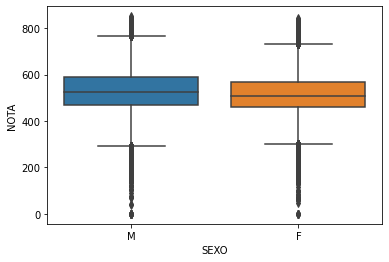

In [85]:
import seaborn as sns

sns.boxplot(x = 'SEXO', y = 'NOTA', data=enem)

* `Conclusão`: 
    * Feminino são maioria, representando quase 60%. Enquanto masculino representam pouco mais de 40%.
    * Masculino possui maior frequencia de notas altas comparado com feminino.
    * A média da nota final do masculino é superior a média do feminino.

### Etapa 2.5 - Análise da nota final do Enem 2019 por sexo e tipo de escola

In [95]:
enem.groupby(['SEXO', "ESCOLA_ENS_MEDIO"])['NOTA'].mean()

SEXO  ESCOLA_ENS_MEDIO
F     Privada            547.32
      Publica            514.18
M     Privada            558.71
      Publica            525.32
Name: NOTA, dtype: float64

In [96]:
enem.groupby(['SEXO', "ESCOLA_ENS_MEDIO"])['NOTA'].min()

SEXO  ESCOLA_ENS_MEDIO
F     Privada            0.00
      Publica            0.00
M     Privada            0.00
      Publica            0.00
Name: NOTA, dtype: float64

In [97]:
enem.groupby(['SEXO', "ESCOLA_ENS_MEDIO"])['NOTA'].max()

SEXO  ESCOLA_ENS_MEDIO
F     Privada            842.70
      Publica            835.90
M     Privada            850.82
      Publica            846.26
Name: NOTA, dtype: float64

In [94]:
enem.groupby(['SEXO', "ESCOLA_ENS_MEDIO"])['NOTA'].std()

SEXO  ESCOLA_ENS_MEDIO
F     Privada            88.28
      Publica            79.88
M     Privada            88.56
      Publica            84.49
Name: NOTA, dtype: float64

* `Conclusão`: 
    * Em relação a média, percebe-se que as médias dos alunos de escolas privadas são maiores quando comparados com alunos de escolas públicas.
    * Isso pode indicar problemas na educação.
    * Ao olhar a maior nota, mais uma vez, os alunos de escola particular apresentaram notas maiores quando comparados com os alunos da escola pública.

### Etapa 2.6 - Análise da nota final do Enem 2019 por por sexo, cor e tipo de escola:


In [107]:

enem.groupby(['SEXO', 'COR/RACA', "ESCOLA_ENS_MEDIO"])['NOTA'].mean()

SEXO  COR/RACA  ESCOLA_ENS_MEDIO
F     Amarelo   Privada            544.62
                Publica            509.89
      Branco    Privada            573.28
                Publica            539.03
      Indígena  Privada            491.81
                Publica            471.67
      Pardo     Privada            523.01
                Publica            500.62
      Preto     Privada            513.02
                Publica            498.20
M     Amarelo   Privada            561.33
                Publica            526.41
      Branco    Privada            580.18
                Publica            548.78
      Indígena  Privada            505.00
                Publica            478.10
      Pardo     Privada            539.16
                Publica            513.07
      Preto     Privada            524.58
                Publica            506.89
Name: NOTA, dtype: float64

 * `Conclusão`: 
    * Mais uma vez, os indígenas e pessoas da cor preta possuem as menores notas.
    * Indivíduos de escolas particulares evidenciam as maiores notas.

In [102]:
# Média da nota final por classe:

enem.groupby(["RENDA_FAMILIAR(SALARIOS)"])[["NOTA"]].mean().sort_values(ascending = False, by = "NOTA")

,NOTA
RENDA_FAMILIAR(SALARIOS),
Q (Mais de 20),637.72
P (15 a 20),629.54
O (12 a 15),622.02
N (10 a 12),613.71
M (9 a 10),605.87
L (8 a 9),603.26
K (7 a 8),595.84
J (6 a 7),590.71
I (5 a 6),580.24


 * `Conclusão`: 
    * Pessoas de classes mais altas, apresentaram as maiores médias.
    * Isso pode evidenciar melhores condições de acesso a N fatores.

In [105]:
# Média da nota final por classe e sexo:

enem.groupby(["RENDA_FAMILIAR(SALARIOS)", "SEXO"])['NOTA'].mean()

RENDA_FAMILIAR(SALARIOS)  SEXO
A (0)                     F      469.73
                          M      481.47
B (0 a 1)                 F      480.50
                          M      488.51
C (1 a 1,5)               F      501.37
                          M      508.67
D (1,5 a 2)               F      520.76
                          M      526.07
E (2 a 2,5)               F      529.19
                          M      533.49
F (2,5 a 3)               F      546.38
                          M      548.23
G (3 a 4)                 F      555.39
                          M      555.79
H (4 a 5)                 F      572.83
                          M      570.64
I (5 a 6)                 F      581.50
                          M      578.82
J (6 a 7)                 F      592.69
                          M      588.42
K (7 a 8)                 F      597.74
                          M      593.70
L (8 a 9)                 F      605.66
                          M      600.56
M (9 a 10

 * `Conclusão`: 
    * Mais uma vez, rendas maiores permitem acesso a educação de melhor qualidade.
    * As notas dos meninos e das meninas, para cada faixa de renda, são bem parecidas.

In [106]:
# Média da nota final comparando candidatos que têm e os que não têm internet em casa:

enem.groupby(["ACESSO_INTERNET"])[["NOTA"]].mean().sort_values(ascending = False, by = "NOTA")

,NOTA
ACESSO_INTERNET,
Sim,534.84
Nao,480.96


 * `Conclusão`: 
    * Percebe-se que quem possui acesso à internet apresenta um desempenho melhor na nota.
    * Isso pode ser explicado pelo fato de melhores condições de estudo.

In [ ]:
# Análise de candidatos por tipo de escola e renda:
df[["TIPO_ESCOLA", "RENDA_MENSAL_FAMILIAR" ]].value_counts()

* `Conclusão`: 
    * Candidatos das classes C, D e E são maioria analisando o todo. Entre escolas públicas e privadas, notamos que as mesmas classes de escolas públicas são maioria em relação às escolas privadas.

Análises Complementares

In [ ]:
# Quantidade de alunos em escolas públicas e particulares:
df[["TIPO_ESCOLA"]].value_counts()

In [ ]:
# Quantidade de alunos em escolas públicas e particulares, separados por sexo:

In [ ]:
df.groupby(['SEXO'])['TIPO_ESCOLA'].value_counts()

In [ ]:
# Como esperado, temos mais pessoas de escolas públicas, tanto do sexo masculino
# quanto do sexo feminino.

In [ ]:
# Análise de estudandes classe A:
df.groupby(['TIPO_ESCOLA'])['RENDA_MENSAL_FAMILIAR'].value_counts()

In [ ]:
# temos mais indivíduos da classe A em colégios privados
# quanto comparados em escola pública.

**Análise: Qual Estado possui maior quantidade de abstenções?**

In [ ]:
# criando uma cópia do df1 e selecionando apenas as linhas com "Nota" == NaN
df_2 = df.copy()
df_2 = df_2[df_2["NOTA"].isna()]
df_2

In [ ]:
df_2 = df_2[['UF_RESIDENCIA']].value_counts()

In [ ]:
df_3 = df[['UF_RESIDENCIA']].value_counts()

In [ ]:
df_3

In [ ]:
# criando um df4 (auxiliar) para comparar totalidade vs abstenções:
df_4 = pd.concat([df_3, df_2], axis = 1, join = "outer")

In [ ]:
df_4

In [ ]:
# renoamenado as colunas:
df_4.columns = ["TOTAL_CANDIDATOS", "ABSTENCOES"]
df_4

In [ ]:
# calculando as abstenções em percentual:
df_4["PERCENTUAL"] = (df_4.ABSTENCOES / df_4.TOTAL_CANDIDATOS) * 100
df_4

In [ ]:
# ordenando descending:
df_4[["PERCENTUAL"]].sort_values(ascending = False, by = "PERCENTUAL")

In [ ]:
# calculando a média de abstenções:
df_4["PERCENTUAL"].mean()

In [ ]:
# TEMOS UMA MÉDIA GERAL DE 27,72% DE ABSTENÇÕES

**Análise: Qual Estado (residência) possui a maior nota (na média)?**

In [ ]:
df.groupby(["UF_RESIDENCIA"])[["NOTA"]].mean().sort_values(ascending = False, by = "NOTA")

**Análise: Qual Estado (nascimento) possui a maior nota (na média)?**

In [ ]:
df.groupby(["UF_NASCIMENTO"])[["NOTA"]].mean().sort_values(ascending = False, by = "NOTA")

In [ ]:
# podemos perceber que SP lidera nas duas ocasiões, com algumas alterações de posição
# no decorrer da tabela

# 2 - ANÁLISE REMOVENDO OS NaN's

# PARTE I

In [ ]:
# Importação
import numpy as pd
import pandas as pd
import pandas_profiling as pp
import warnings

In [ ]:
# Formatando para 2 casas após a vírgula
pd.options.display.float_format= "{:,.2f}".format
# Ignorando warnings
warnings.filterwarnings("ignore")

In [ ]:
# Carregando os dados e viualizando
df = pd.read_csv("MICRODADOS_ENEM_2019.csv", encoding='latin-1', sep=";")
df

In [ ]:
# Tipo
type(df)

In [ ]:
# Dimensões
print(df.ndim)

In [ ]:
print(df.shape)

In [ ]:
print(df.size)

In [ ]:
# ìndice
df.index

In [ ]:
# Tipo de variáveis
df.dtypes

In [ ]:
# Visualização de dados
df.head(10)

In [ ]:
df.tail(10)

In [ ]:
# Análise
df.describe()

In [ ]:
df.describe(include='all')

In [ ]:
df.info()

In [ ]:
# Nome das colunas
df.columns

In [ ]:
# Verificando total de valores NA (missing) por variável
df.isna().sum()

In [ ]:
# Drop de colunas que não interessam
df.drop(["TP_ANO_CONCLUIU", "IN_TREINEIRO", "CO_UF_NASCIMENTO", "SG_UF_NASCIMENTO", "CO_MUNICIPIO_RESIDENCIA", "CO_UF_RESIDENCIA", "CO_ESCOLA", "CO_UF_ESC", "CO_UF_PROVA", 'NU_INSCRICAO', 'NU_ANO', 'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', "IN_SURDEZ", 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', "IN_DEFICIENCIA_AUDITIVA", "IN_SURDO_CEGUEIRA", "IN_DEFICIENCIA_FISICA", "IN_DEFICIENCIA_MENTAL", "IN_DEFICIT_ATENCAO", "IN_DISLEXIA", "IN_DISCALCULIA", "IN_AUTISMO", "IN_VISAO_MONOCULAR", "IN_OUTRA_DEF", "IN_GESTANTE", "IN_LACTANTE", "IN_IDOSO", "IN_ESTUDA_CLASSE_HOSPITALAR", "IN_SEM_RECURSO", "IN_BRAILLE", "IN_AMPLIADA_24", "IN_AMPLIADA_18", "IN_LEDOR", "IN_ACESSO", "IN_TRANSCRICAO", "IN_LIBRAS", "IN_TEMPO_ADICIONAL", "IN_LEITURA_LABIAL", "IN_MESA_CADEIRA_RODAS", "IN_MESA_CADEIRA_SEPARADA", "IN_APOIO_PERNA", "IN_GUIA_INTERPRETE", "IN_COMPUTADOR", "IN_CADEIRA_ESPECIAL", "IN_CADEIRA_CANHOTO", "IN_CADEIRA_ACOLCHOADA", "IN_PROVA_DEITADO", "IN_MOBILIARIO_OBESO", "IN_LAMINA_OVERLAY", "IN_PROTETOR_AURICULAR", "IN_MEDIDOR_GLICOSE", "IN_MAQUINA_BRAILE", "IN_SOROBAN", "IN_MARCA_PASSO", "IN_SONDA", "IN_MEDICAMENTOS", "IN_SALA_INDIVIDUAL", "IN_SALA_ESPECIAL", "IN_SALA_ACOMPANHANTE", "IN_MOBILIARIO_ESPECIFICO", "IN_MATERIAL_ESPECIFICO", "CO_MUNICIPIO_PROVA", "NO_MUNICIPIO_PROVA", "CO_UF_PROVA", "CO_PROVA_CN", "CO_PROVA_CH", "CO_PROVA_LC", "CO_PROVA_MT", "TX_RESPOSTAS_CN", "TX_RESPOSTAS_CH", "TX_RESPOSTAS_LC", "TX_RESPOSTAS_MT", "TX_GABARITO_CN", "TX_GABARITO_CH", "TX_GABARITO_LC", "TX_GABARITO_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "Q007", "Q010", "Q011", "Q013", "Q014", "Q015", "Q016", "Q017", "Q018", "Q020", "Q021", "Q023", "TP_ENSINO", "TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT", "TP_STATUS_REDACAO", "TP_ST_CONCLUSAO"], axis=1, inplace = True)
df
# TP_ANO_CONCLUIU
# IN_TREINEIRO

In [ ]:
df.memory_usage()

In [ ]:
df.info()

In [ ]:
# Renomeando colunas
df.columns = [ "nom_mun_res", "sig_uf_res", "idade", "sexo", "est_civil", "cor", "tip_esc", "nom_social", "uf_esc", "nota_cien_nat", "nota_cien_hum", "nota_ling", "nota_mat", "idioma", "nota_red", "pai_esc", "mae_esc", "ocup_pai", "ocup_mae", "qtde_pes_casa", "renda_men", "tem_wc", "tem_quartos", "tem_geladeira", "tem_tv", "tem_cel", "tem_pc", "tem_net"]
df.columns
# "cor", "ano_concl_em", "tip_esc"
# "tip_esc", "treino", "nom_social"

In [ ]:
df

In [ ]:
df.isna()

In [ ]:
# Verificando total de valores NA (missing) por variável
df.isna().sum()

In [ ]:
# Em idade, temos poucos valores ausentes. 
# Dessa forma, vamos verificar a média e mediana para imputar valores.
# Optou-se pela mediana devido aos "outliers".
# Além de ter poucos NAs.

In [ ]:
df.idade.max()

In [ ]:
df.idade.min()

In [ ]:
df.idade.mean()

In [ ]:
df.idade.median()

In [ ]:
mediana = df.idade.median()
media = df.idade.mean()

In [ ]:
df['idade'].fillna(mediana, inplace = True)
df.isna().sum()

In [ ]:
# Criando as regiões do Brasil
df["regiao_br"] = df.sig_uf_res

In [ ]:
df["regiao_br"].unique()

In [ ]:
df.regiao_br.replace({'PR': "sul", 'SP': "sudeste", 'PA': "norte", 'TO': "norte", 'RS': "sul", 'AL': "nordeste", 'BA': "nordeste", 'AP': "norte", 'MG': "sudeste", 'AM': "norte", 'GO': "centro-oeste",
       'MA': "nordeste", 'RJ': "sudeste", 'CE': "nordeste", 'RO': "norte", 'MT': "centro-oeste", 'PE': "nordeste", 'RN': "nordeste", 'AC': "norte", 'ES': "sudeste", 'PI': "nordeste", 'SE': "nordeste",
       'DF': "centro-oeste", 'SC': "sul", 'PB': "nordeste", 'MS': "centro-oeste", 'RR': "norte"}, inplace = True)

In [ ]:
df["regiao_br"].unique()

In [ ]:
# Criando a nota final do Enem
df["nota_final"] = ((df.nota_red + df.nota_cien_nat + df.nota_cien_hum + df.nota_ling + df.nota_mat) / 5)
df

In [ ]:
df.isna().sum()

In [ ]:
# Verificando número de faltosos/eliminados:
# Total de dados: 5,095,270
# Total de nota_final = nan: 1,393,263
# Em termos %: (1,393,263 / 5,095,270) * 100 = 27.344242797732015 %
faltosos = (1393263 / 5095270) * 100
faltosos

In [ ]:
df.reset_index(inplace = True)
df

In [ ]:
df.drop(['index'], axis = 1, inplace = True)
df

In [ ]:
# Agora, salvando os dados:
# Salvando em csv
df.to_csv('df_trabalhando_I.csv', sep=';', index=False)

# PARTE II

In [ ]:
# Importação
import numpy as pd
import pandas as pd
import pandas_profiling as pp
import warnings

In [ ]:
# Formatando para 2 casas após a vírgula
pd.options.display.float_format= "{:,.2f}".format
# Ignorando warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("df_trabalhando_I.csv", encoding='utf-8', sep=";")
df

In [ ]:
# Removendo linhas que não interessam:
# Estado civil "não informado"
index_names = df[df['est_civil'] == 0 ].index
index_names
# Deletando as linhas com esses índices do DataFrame
df.drop(index_names , inplace=True)
df.head(25)

In [ ]:
# Cor "não declarado"
index_names = df[df['cor'] == 0 ].index
# Deletando as linhas com esses índices do DataFrame
df.drop(index_names , inplace=True)

In [ ]:
# Tipo de escola "não respondeu"
index_names = df[df['tip_esc'] == 0 ].index
# Deletando as linhas com esses índices do DataFrame
df.drop(index_names , inplace=True)

In [ ]:
# Escolaridade da mãe "não sei"
index_names = df[df['mae_esc'] == "H" ].index
# Deletando as linhas com esses índices do DataFrame
df.drop(index_names , inplace=True)

In [ ]:
# Escolaridade do pai "não sei"
index_names = df[df['pai_esc'] == "H" ].index
# Deletando as linhas com esses índices do DataFrame
df.drop(index_names , inplace=True)

In [ ]:
# Ocupação do pai "não sei"
index_names = df[df['ocup_pai'] == "F" ].index
# Deletando as linhas com esses índices do DataFrame
df.drop(index_names , inplace=True)

In [ ]:
# Ocupação da mãe "não sei"
index_names = df[df['ocup_mae'] == "F" ].index
# Deletando as linhas com esses índices do DataFrame
df.drop(index_names , inplace=True)

In [ ]:
# Problemático - Excluir: muitos NAs
# Ano de conclusão do ensino médio "não informado"
# index_names = df[df['ano_concl_em'] == 0 ].index
# Deletando as linhas com esses índices do DataFrame
# df.drop(index_names , inplace=True)

In [ ]:
# Excluindo a escolaridade incompleta dos pais
index_names = df[df['pai_esc'] == "B" ].index
# Deletando as linhas com esses índices do DataFrame
df.drop(index_names , inplace=True)

In [ ]:
index_names = df[df['pai_esc'] == "C" ].index
# Deletando as linhas com esses índices do DataFrame
df.drop(index_names , inplace=True)

In [ ]:
index_names = df[df['mae_esc'] == "B" ].index
# Deletando as linhas com esses índices do DataFrame
df.drop(index_names , inplace=True)

In [ ]:
index_names = df[df['mae_esc'] == "C" ].index
# Deletando as linhas com esses índices do DataFrame
df.drop(index_names , inplace=True)

In [ ]:
index_names = df[df['tip_esc'] == 1 ].index
index_names
# Deletando as linhas com esses índices do DataFrame
df.drop(index_names , inplace=True)

In [ ]:
# Criando classes pela renda mensal, ocupação e escolaridade (completa) dos pais
df.renda_men.replace({'A':"classe_E", 'B':"classe_E", 'C':"classe_E", 'D':"classe_E", 'E':"classe_D", 'F':"classe_D", 'G':"classe_D", 'H':"classe_C", 'I':"classe_C", 'J':"classe_C", 'K':"classe_C", 'L':"classe_C", 'M':"classe_C", 'N':"classe_B", 'O':"classe_B", 'P':"classe_B", 'Q':"classe_A"}, inplace = True)
df.ocup_mae.replace({'A':"ocup_mae_bai_qua", 'B':"ocup_mae_bai_qua", 'C':"ocup_mae_med_qual", 'D':"ocup_mae_med_qual", 'E':"ocup_mae_alt_qual"}, inplace = True)
df.ocup_pai.replace({'A':"ocup_pai_bai_qua", 'B':"ocup_pai_bai_qua", 'C':"ocup_pai_med_qual", 'D':"ocup_pai_med_qual", 'E':"ocup_pai_alt_qual"}, inplace = True)
df.mae_esc.replace({'A':"mae_analf", 'D':"mae_fund_compl", 'E':"mae_med_compl", 'F':"mae_grad_compl", 'G':"mae_pos_compl"}, inplace = True)
df.pai_esc.replace({'A':"pai_analf", 'D':"pai_fund_compl", 'E':"pai_med_compl", 'F':"pai_grad_compl", 'G':"pai_pos_compl"}, inplace = True)
df

In [ ]:
# Transformando diversas variáveis
df.idioma.replace({0:"ingles", 1:"espanhol" }, inplace = True)
# df.treino.replace({1:"sim", 0:"não" }, inplace = True)
df.cor.replace({1:"branca", 2:"preta", 3: "parda",  4: "amarela", 5: "indígena"}, inplace = True)
df.est_civil.replace({1:"solteiro", 2:"casado", 3: "separado",  4: "viúvo"}, inplace = True)
df.nom_social.replace({1:"sim", 0:"não"}, inplace = True)
df.tip_esc.replace({2:"pública", 3:"privada", 4: "exterior"}, inplace = True)
df

In [ ]:
# Transformando mais variáveis
df.tem_net.replace({'A':0, 'B':1}, inplace = True)
df.tem_pc.replace({'A':0, 'B':1, 'C':1, 'D':1, 'E':1}, inplace = True)
df.tem_cel.replace({'A':0, 'B':1, 'C':1, 'D':1, 'E':1}, inplace = True)
df.tem_tv.replace({'A':0, 'B':1, 'C':1, 'D':1, 'E':1}, inplace = True)
df.tem_geladeira.replace({'A':0, 'B':1, 'C':1, 'D':1, 'E':1}, inplace = True)
df.tem_quartos.replace({'A':0, 'B':1, 'C':1, 'D':1, 'E':1}, inplace = True)
df.tem_wc.replace({'A':0, 'B':1, 'C':1, 'D':1, 'E':1}, inplace = True)
df

In [ ]:
df.tem_net.replace({0: "não", 1: "sim"}, inplace = True)
df.tem_pc.replace({0: "não", 1: "sim"}, inplace = True)
df.tem_cel.replace({0: "não", 1: "sim"}, inplace = True)
df.tem_tv.replace({0: "não", 1: "sim"}, inplace = True)
df.tem_geladeira.replace({0: "não", 1: "sim"}, inplace = True)
df.tem_quartos.replace({0: "não", 1: "sim"}, inplace = True)
df.tem_wc.replace({0: "não", 1: "sim"}, inplace = True)
df

In [ ]:
df.isna().sum()

In [ ]:
# Dropando valores NAs (linhas)
df.dropna(axis = 0, inplace = True)
df

In [ ]:
df.isna().sum()

In [ ]:
df.reset_index(inplace = True)
df

In [ ]:
df.drop(['index'], axis = 1, inplace = True)
df

In [ ]:
# Agora, salvando os dados:
# Salvando em csv
df.to_csv('df_trabalhando_II.csv', sep=';', index=False)

# PARTE III

Análises.

In [ ]:
# Importação
import numpy as pd
import pandas as pd
import pandas_profiling as pp
import warnings

In [ ]:
# Formatando para 2 casas após a vírgula
pd.options.display.float_format= "{:,.2f}".format
# Ignorando warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("df_trabalhando_II.csv", encoding='utf-8', sep=";")
df

In [ ]:
df.corr()

In [ ]:
# Por mais que algumas variáveis possam estar correlacionadas com outras, como a intenção é 
# realizar uma análise exploratória, não tem problema em ter "resultados" parecidos.

In [ ]:
pp.ProfileReport(df, explorative=True)

In [ ]:
df

In [ ]:
df.isna().sum()

In [ ]:
df.info()

In [ ]:
# Quantidade de pessoas do sexo masculino e feminino que tiveram nota final do Enem 2019

# Pessoas do sexo feminino são maioria, representando quase 56%;
# Enquanto indivíduos do sexo masculino representam pouco mais de 44%.

In [ ]:
df.sexo.value_counts()

In [ ]:
fem = (295808 / (295808 + 235827)) * 100
fem

In [ ]:
masc = (235827 / (295808 + 235827)) * 100
masc

In [ ]:
# Média de idade

# Média de idades das pessoas que fizeram Enem em 2019 é de 17,69 anos.

In [ ]:
df.idade.mean()

In [ ]:
# Média de idade por sexo:

# Idades médias muito próximas (meninos (17,72) e meninas (17,67)).

In [ ]:
df.groupby(['sexo']).idade.mean()

In [ ]:
# Média de idade por sexo, cor e tipo de escola:

# Tanto pessoas do sexo feminino, quanto masculino, 
# percebe-se que entre os índigenas e pessoas pretas possuem 
# média de idade maior.
# Isso pode indicar algum tipo de dificuldade de acesso a educação e 
# melhores qualidades de vida por # parte dessas pessoas e, talvez, 
# até algum tipo de discriminação (podendo ser vividas por ele ou por seus ascendentes).

In [ ]:
df.groupby(['sexo', "cor", "tip_esc"]).idade.mean()

In [ ]:
# Nota final do Enem 2019 por sexo e tipo de escola:

# Em relação a média, percebe-se que as médias dos alunos de escolas privadas
# são maiores quando comparados com alunos de escolas públicas.
# Isso pode indicar problemas na educação.

# Quando olhamos para a menor nota dos alunos, novamente
# os discentes da escola particular possuem notas maiores.
# Novamente, pode indicar problemas na educação.

# Ao olhar a maior nota, mais uma vez, os alunos de escola particular
# apresentaram notas maiores quando comparados com os alunos da escola pública.
# Vale ressaltar que, entre os meninos, essa diferença foi bem menor, quando 
# comparado com as meninas.

# Já o desvio padrão evidencia que existe uma maior variabilidade das notas
# dos alunos da escola pública (ao se comparar com discentes de escolas particulares).

In [ ]:
df.groupby(['sexo', "tip_esc"])['nota_final'].mean()

In [ ]:
df.groupby(['sexo', "tip_esc"])['nota_final'].min()

In [ ]:
df.groupby(['sexo', "tip_esc"])['nota_final'].max()

In [ ]:
df.groupby(['sexo', "tip_esc"])['nota_final'].std()

In [ ]:
# Nota final do Enem 2019 por sexo, cor e tipo de escola:

# Mais uma vez, os indígenas e pessoas da cor preta possuem as menores notas.
# Indivíduos de escolas particulares evidenciam as maiores notas.

In [ ]:
df.groupby(['sexo', 'cor', "tip_esc"])['nota_final'].mean()

In [ ]:
# Média da nota final por classe:

# Pessoas de classes mais altas, apresentaram as maiores médias.
# Isso pode evidenciar melhores condições de acesso a n fatores.

In [ ]:
df.groupby(["renda_men"])['nota_final'].mean()

In [ ]:
# Média da nota final por classe e sexo:

# Mais uma vez, rendas maiores permitem acesso a educação de melhor qualidade.
# As notas dos meninos e das meninas, para cada faixa de renda, são bem parecidas.

In [ ]:
df.groupby(["renda_men", "sexo"])['nota_final'].mean()

In [ ]:
# Desagregando por notas
# Nota média por prova do Enem 2019 por sexo e tipo de escola:

# Mais uma vez, verificou-se que as notas dos alunos de escolas privadas são maiores
# que a dos alunos de escola públicas.
# Isso corrobora com as análises anteriores.

In [ ]:
df.groupby(['sexo', "tip_esc"])['nota_red', "nota_cien_nat", "nota_cien_hum", "nota_ling", "nota_mat"].mean()

In [ ]:
# Considerando acesso a lazer, saneamento, local adequado para dormir e acesso a geladeira,
# na nota média final do Enem 2019.

# Percebeu-se que quem possui acesso a esses itens, apresenta um desempenho melhor na nota.
# Isso pode ser explicado pelo fato de uma melhor qualidade de vida, além de contribuir 
# para o capital humano.

In [ ]:
df.groupby(["tem_wc"])['nota_final'].mean()

In [ ]:
df.groupby(["tem_quartos"])['nota_final'].mean()

In [ ]:
df.groupby(["tem_geladeira"])['nota_final'].mean()

In [ ]:
df.groupby(["tem_tv"])['nota_final'].mean()

In [ ]:
df.groupby(["tem_cel"])['nota_final'].mean()

In [ ]:
df.groupby([ "tem_pc"])['nota_final'].mean()

In [ ]:
df.groupby(["tem_net"])['nota_final'].mean()

In [ ]:
df.groupby(["tem_pc", "tem_net"])['nota_final'].mean()

In [ ]:
df.groupby(["tem_cel", "tem_net"])['nota_final'].mean()

In [ ]:
# Ocupação dos pais e a nota final

# Comparando a ocupação dos pais, levando em consideração o seu nível educacional,
# é possível verificar que, quanto maior a escolaridade da mãe, maior tende a ser
# o desempenho dos filhos na nota do Enem.
# Isso pode ser explicado pelo fato das mães incentivarem mais os filhos no campo
# educacional.
# Além disso, utilizar a escolaridade da mãe como proxy para a escolaridade dos
# filhos, é uma prática muito utilizada nas pesquisas científicas. 

In [ ]:
df.groupby(["ocup_pai"])['nota_final'].mean()

In [ ]:
df.groupby(["ocup_mae"])['nota_final'].mean()

In [ ]:
# Nome social e nota do final

# Uma pessoa que adota o nome social, a chance dela ter sofrido algum tipo de 
# bullying na escola deve ter sido grande.
# Dessa forma, quando a pessoa adota o nome social, a mesma tende a se sentir melhor,
# um sentimento de pertencimento, pois agora ela começa a ser vista como ela desejou ser.
# Psicologicamente, a adoção desse nome social, permite uma espécie de ânimo
# para a pessoa e, por isso, ela tende a fazer uma prova melhor.
# O mesmo ocorre quando desagregamos a nota final por tipo de prova.

In [ ]:
df.groupby(["nom_social"])['nota_final'].mean()

In [ ]:
df.groupby(["nom_social"])['nota_red', "nota_cien_nat", "nota_cien_hum", "nota_ling", "nota_mat"].mean()

In [ ]:
# Quem possui maior renda, tende a apresentar notas maiores,
# especialmente quando estudam em colégios privados.
# Além disso, pessoas que possuem rendas maiores e que estudam 
# em colégios públicos, também possuem um desempenho melhor,
# quando comparados com demais alunos de colégios públicos.
# Um dos motivos que podem explicar esse fato, é que pessoas
# com maiores poderes aquisitivos possuem melhores condições e, tendem
# a possuir famílias mais estruturadas.

In [ ]:
df.groupby(["tip_esc", "renda_men"])['nota_final'].mean()

In [ ]:
# Nota final na prova por região brasileira

# A região Sudeste apresenta a maior nota final, seguida pela região Sul.
# Isso pode evidenciar disparidades na educação entre as regiões brasileiras.
# Além disso, dependendo da localidade, o acesso a educação
# tende a ser mais difícil, principalmente na região norte,
# que apresentou a menor nota.

In [ ]:
df.groupby(["regiao_br"])['nota_final'].mean()

In [ ]:
# Quando analisamos as notas por região e tipo de escola, 
# é possível verificar que, novamente, as notas de alunos
# de escola pública tendem a ser menores quando comparados com colégios particulares.
# Porém, agora, a nota da região centro-oeste torna-se maior, seguidos
# pelas regiões sul e sudeste - notas muito próximas.

In [ ]:
df.groupby(["regiao_br", "tip_esc"])['nota_final'].mean()

In [ ]:
# Língua estrangeira escolhida:

In [ ]:
df[["idioma" ]].value_counts()

In [ ]:
# Temos uma maior quantidade de pessoas realizando a prova de inglês,
# quando comparado com o espanhol.

In [ ]:
# Candidatos das classes C, D e E são maioria analisando o todo. Entre escolas públicas e privadas,
# notamos que as mesmas classes de escolas públicas são maioria em relação às escolas privadas.

In [ ]:
df[["sexo", "tip_esc", "renda_men" ]].value_counts()

In [ ]:
# Como esperado, temos mais pessoas solteiras fazendo a prova.
# Isso ainda é corroborado pela idade média.

In [ ]:
df[["est_civil" ]].value_counts()

In [ ]:
# Quantidade de candidatos vindos de escolas públicas vs escolas privadas

In [ ]:
df[["tip_esc" ]].value_counts()

In [ ]:
# Quantidade de alunos em escolas públicas, separados por sexo:

# Como esperado, temos mais pessoas de escolas públicas, tanto do sexo masculino
# quanto do sexo feminino.

In [ ]:
df.groupby(['sexo'])['tip_esc'].value_counts()

In [ ]:
# Também esperado, existem mais pessoas de classe mais baixa, quando comparado com classes 
# mais altas.

In [ ]:
df.groupby(['sexo'])['renda_men'].value_counts()

In [ ]:
# Em porcentagem:

In [ ]:
pes_e = ((93761 + 137568 ) / 531635) * 100
pes_d = ((62561 + 75585 ) / 531635) * 100
pes_c = ((53607 + 57628 ) / 531635) * 100
pes_b = ((18038 + 18035 ) / 531635) * 100
pes_a = ((7860 + 6992 ) / 531635) * 100
print(pes_e, pes_d, pes_c, pes_b, pes_a)

43.5127484082124 + 25.98512137086535 + 20.923189782463535 + 6.785294421924817 + 2.7936460165339003


In [ ]:
# Em termos percentuais, temos mais indivíduos da classe A em colégios privados
# quanto comparados em escola pública.

In [ ]:
df.groupby(['tip_esc'])['renda_men'].value_counts()

Considerações finais da análise sem os NA's

Vale lembrar que as análises apresentadas não indicam causalidade.
Aqui, foram criados classes, com base na renda. Dessa forma, quanto maior a classe social do aluno, maior tende a ser a nota final desse aluno. Isso pode evidenciar melhores condições de acesso a n fatores.
Muito se fala de capital humano e sua importância. 
Porém, ao se falar em capital humano, a maioria das pessoas só lembram da educação. Mas, vale ressaltar que Saúde também é uma categoria de capital humano.
Sendo assim, a ideia é usar, tanto educação, quanto saúde, nas análises – variáveis essas, que foram criadas a partir do nosso banco de dados.
Na parte da saúde, considerando saneamento, geladeira e sono, todos dando uma qualidade de vida, nos dizem que:
Alunos que possuem acesso a banheiro (saneamento) tendem a apresentar uma nota final no enem maior; o mesmo vale para a presença de quartos (melhor qualidade de sono) na casa e de geladeira (acondicionar alimentos e uma melhor alimentação); 
Também foi considerado a ideia do lazer e acesso a informação: presença de TV, celular, internet e computador, pessoas que possuem acesso a isso, também apresentaram nota final maior.
Agora, falando em educação, foi criado variáveis do tipo de ocupação dos pais, separadas em alto, média e baixa, considerando os níveis de educação dos pais. Observou-se que quanto maior o nível educacional dos pais, maior tende ser a nota final do aluno.
Vale ressaltar que a educação da mãe é utilizada como proxy da educação dos filhos, pois tendem a incentivar mais os filhos na área educacional. Isso é interessante, pois esses alunos estão em idade economicamente ativa e, sabe-se que, quanto maior a educação, maior tende a ser a produtividade do indivíduo e, consequentemente, maior tende ser a contribuição desse indivíduo no PIB do país - e poderá auferir rendimentos maiores.
Agora, por fim, verificou-se o uso do nome social e a nota final. Observou-se que quem adotou o nome social apresentou uma nota maior. Isso pode ser explicado pelo sentimento do pertencimento dessa pessoa. 
